In [ ]:
!git clone https://github.com/thanhvdt/jigsaw-toxic-comment-classification.git

Cloning into 'jigsaw-toxic-comment-classification'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (2/2), done.
remote: Total 10 (delta 0), reused 2 (delta 0), pack-reused 8
Unpacking objects: 100% (10/10), 52.84 MiB | 4.88 MiB/s, done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
import numpy as np
import re
import nltk 
import csv
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv('/content/jigsaw-toxic-comment-classification/data/train.csv')

# Data exploration

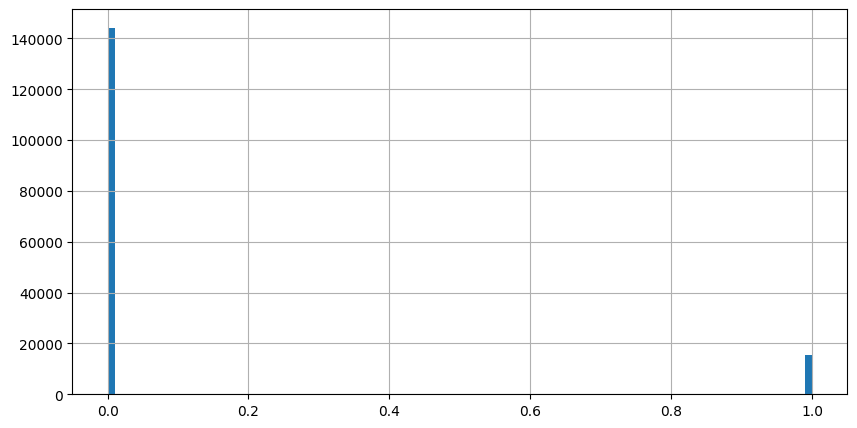

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
data['toxic'].hist(bins = 100)
plt.show()

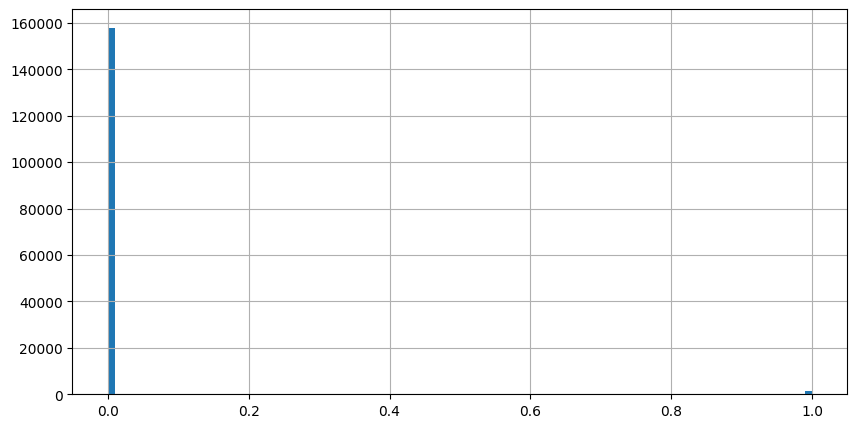

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
data['severe_toxic'].hist(bins = 100)
plt.show()

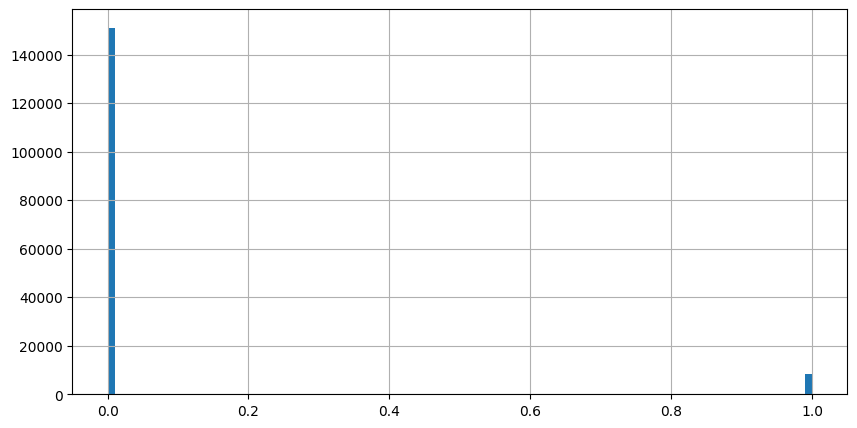

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
data['obscene'].hist(bins = 100)
plt.show()

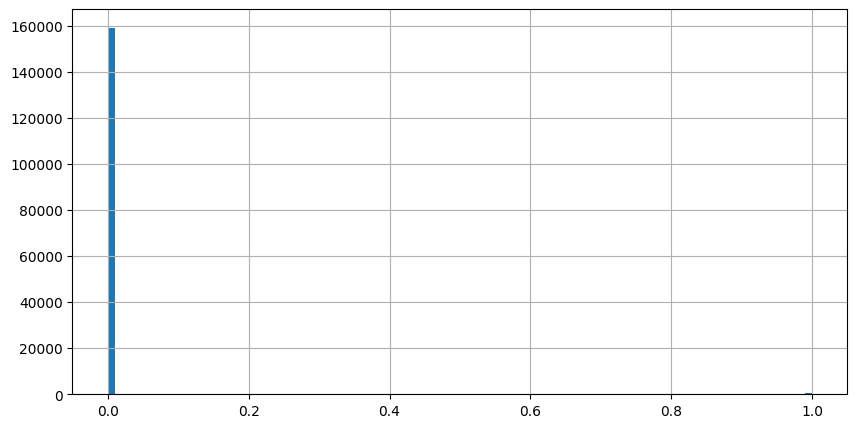

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
data['threat'].hist(bins = 100)
plt.show()

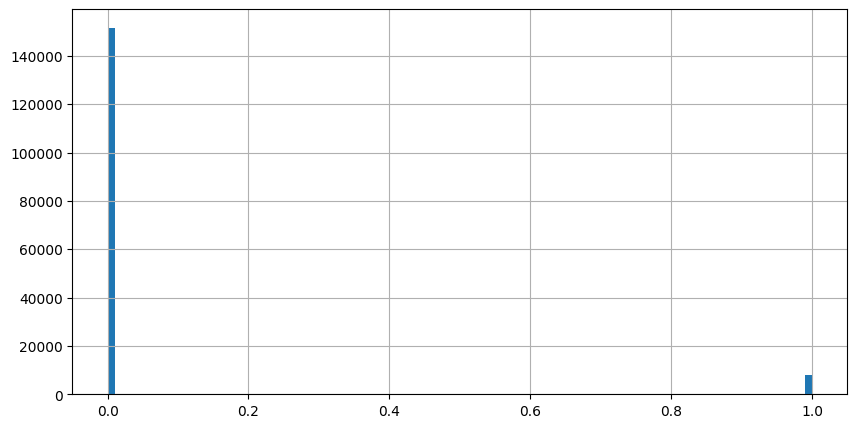

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
data['insult'].hist(bins = 100)
plt.show()

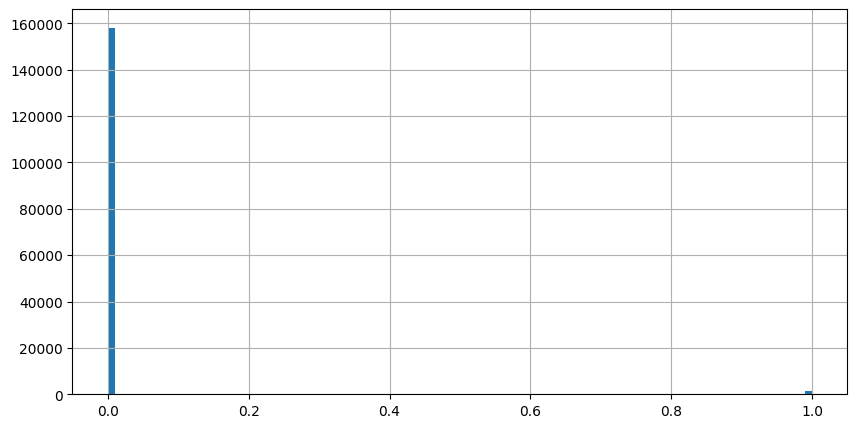

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
data['identity_hate'].hist(bins = 100)
plt.show()

### Comments on Data Exploration

# Preprocess
- 83462 rows × 45 columns

In [ ]:
#drop id
data = data.drop('id', axis = 1)

In [ ]:
#check null values:
null_counts = data.isnull().sum()
null_counts

comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
#check duplicate values
duplicate = data.duplicated()
duplicate

0         False
1         False
2         False
3         False
4         False
          ...  
159566    False
159567    False
159568    False
159569    False
159570    False
Length: 159571, dtype: bool

In [ ]:
data

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
for col in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    print(f'****** {col} *******')
    display(data.loc[data[col]==1,['comment_text',col]].sample(10))

****** toxic *******


,comment_text,toxic
17098,"""\n\n==Hey Travis deleting shit isn't somethin...",1
108908,"Jeff G is a faggot, as well as J Delanoy. They...",1
128943,SO GUYS THIS USER BY THE NAME O FJRGUGFAGGOT G...,1
138714,mother fucking cunt bitch,1
974,"""\n\n SR/CL: \n\nU bud bin A-way. Like long ti...",1
137732,I don't care.\nStrange hinted not in that stup...,1
44214,"If I hack your account, I am going to poop on ...",1
49487,Wow! I see you are a lawyer. What kind of half...,1
82108,Fuck you\n\nDon't be asking for me to be banne...,1
37978,__________________________\nListen piece of ba...,1


****** severe_toxic *******


,comment_text,severe_toxic
59457,F U C K O F F \n\nYOU ARE THE BIGEST C U N...,1
129083,why? \n\nfuck you you fucking whore.\nyou stup...,1
149574,veggietales sucks veggietales sucks veggietale...,1
149553,"you bunch of cock cucking, toilet scrubbing, t...",1
55910,"Listen, fuckers, why dont you all come say thi...",1
84374,Hello you nazi piece of shit \n\nPlease be awa...,1
38513,AM GOING TO RAPE YOU IN THE ASS YOU FAT BITCH ...,1
33098,thSUCK A BIG FAT DICK MOGLUCY!!!!!!!!!!!!!!!!!...,1
53665,"FUCK YOU GEORGE \n\nYOU GET MY POINT, AKHTAK S...",1
78767,"a reminder you are late on the rent, puta\n\n]...",1


****** obscene *******


,comment_text,obscene
33951,GO FUCK YOURSELF BITCH. I HATE YOUR SOULD. M...,1
52958,{unblock}} well at least i'm not a gay fag lik...,1
151510,fuck you...my wish...its a public property,1
134618,Neither of those is a personal attack. The fir...,1
16566,"You're a cocksucker, Rick! \n\nYou're a cocksu...",1
21305,Jéské Couriano is a stupid faggot!!!! \n\nJés...,1
14108,you idiotic dung whore,1
47411,"""\n\n dts \n\nNothing was """"varified"""" and you...",1
114946,"GOD DAMN \n\nGOD DAMN it fuckers, i am using t...",1
16799,Eat shit and die \n\nYou can block me now but ...,1


****** threat *******


,comment_text,threat
75271,"""\n\n D€ATH TO NORWEGIANS AND ALL ANTI-SEℳITES...",1
40704,ONCE AGAIN JD UK IS A FUCKING FAGGOT FUCKER WH...,1
76729,"""\n\n A knife for you! \n\n A knife for you! ...",1
40041,HEY STAY THE FUCK OUT OF MY BUISNESS YOU JEWIS...,1
124954,I know who you are and if you edit any of my s...,1
34818,"You. \n\nYou're such a sad person, the fact yo...",1
2018,You are a gay homo. I hope you choke on your p...,1
53149,I will castrate you and roast your testicles \...,1
39864,They are called Syed \nYou dirty chump.Muhajir...,1
84393,"COME ON, SUCKA! \nI WILL PUNCH YOUR FUCKING FA...",1


****** insult *******


,comment_text,insult
103703,why you're being a complete jerk,1
148838,"you slut, leave me alone",1
82920,YO\n\nI don't appreciate you pushing me as a b...,1
107061,your a retarted shithead,1
19643,you are the biggest jerk ever. what nerd join...,1
38037,== T never said i did you ugly bastard. Get o...,1
146605,"Dude, did you know, it literally, slows down C...",1
121335,You're dead \n\nIt won't be hard finding your ...,1
73549,Bollocks \n\nI'm away off for a while and may ...,1
144790,Fool \n\nYou are another fuckin moron on here ...,1


****** identity_hate *******


,comment_text,identity_hate
125806,GAY..... \n\nI THINK YOUR REALLY REALLY GAY AN...,1
30156,hey faggot. \n\nInsert non-formatted text here...,1
23303,HEY BITCH STOP TAKING DOWN OUR FUCKING EVENT P...,1
106230,"Second level warning my arse, you American cunt",1
88444,Cocksucker \n\nBILLCJ YOU ARE A COMPLETE FUCKF...,1
79300,"DISGUSTING\nYou sick Eastern Euros, blaming a ...",1
148985,YOU FAT SLIMY PIECE OF SHIT \n\nI HOPE YOU FAL...,1
141765,We should point out her filthy political philo...,1
95596,"R u gay? \n\nHi, are you a faggot?",1
3599,similar concept? how can you mark a modern day...,1


In [ ]:
stop = stopwords.words('english')

In [ ]:
#clean data using regex
# def clean_text(text, remove_stopwords = True):
#     output = ""
#     text = str(text).replace("\n", "")
#     text = re.sub(r'[^\w\s]','',text).lower()
#     if remove_stopwords:
#         text = text.split(" ")
#         for word in text:
#             if word not in stopwords.words("english"):
#                 output = output + " " + word
#     else:
#         output = text
#     return str(output.strip())[1:-3].replace("  ", " ")
  

def clean(data, col):
    
    data[col] = data[col].str.replace(r"what's", "what is ")    
    data[col] = data[col].str.replace(r"\'ve", " have ")
    data[col] = data[col].str.replace(r"can't", "cannot ")
    data[col] = data[col].str.replace(r"n't", " not ")
    data[col] = data[col].str.replace(r"i'm", "i am ")
    data[col] = data[col].str.replace(r"\'re", " are ")
    data[col] = data[col].str.replace(r"\'d", " would ")
    data[col] = data[col].str.replace(r"\'ll", " will ")
    data[col] = data[col].str.replace(r"\'scuse", " excuse ")
    data[col] = data[col].str.replace(r"\'s", " ")

    # Clean some punctutations
    data[col] = data[col].str.replace('\n', ' \n ')
    data[col] = data[col].str.replace(r'([a-zA-Z]+)([/!?.])([a-zA-Z]+)',r'\1 \2 \3')
    # Replace repeating characters more than 3 times to length of 3
    data[col] = data[col].str.replace(r'([*!?\'])\1\1{2,}',r'\1\1\1')    
    # Add space around repeating characters
    data[col] = data[col].str.replace(r'([*!?\']+)',r' \1 ')    
    # patterns with repeating characters 
    data[col] = data[col].str.replace(r'([a-zA-Z])\1{2,}\b',r'\1\1')
    data[col] = data[col].str.replace(r'([a-zA-Z])\1\1{2,}\B',r'\1\1\1')
    data[col] = data[col].str.replace(r'[ ]{2,}',' ').str.strip()   
    data[col] = data[col].str.replace(r'[ ]{2,}',' ').str.strip()   
    data[col] = data[col].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    return data
  
  

In [ ]:
clean(data, 'comment_text')

<ipython-input-16-47b198e5c4de>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  data[col] = data[col].str.replace(r"\'ve", " have ")
<ipython-input-16-47b198e5c4de>:23: FutureWarning: The default value of regex will change from True to False in a future version.
  data[col] = data[col].str.replace(r"\'re", " are ")
<ipython-input-16-47b198e5c4de>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  data[col] = data[col].str.replace(r"\'d", " would ")
<ipython-input-16-47b198e5c4de>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  data[col] = data[col].str.replace(r"\'ll", " will ")
<ipython-input-16-47b198e5c4de>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  data[col] = data[col].str.replace(r"\'scuse", " excuse ")
<ipython-input-16-47b198e5c4de>:27: FutureWarning: The default value of

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation Why edits made username Hardcore M...,0,0,0,0,0,0
1,D ' aww ! He matches background colour I ' see...,0,0,0,0,0,0
2,"Hey man, I ' really trying edit war. It guy co...",0,0,0,0,0,0
3,""" More I cannot make real suggestions improvem...",0,0,0,0,0,0
4,"You, sir, hero. Any chance remember page ?",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And second time asking, view completely ...",0,0,0,0,0,0
159567,You ashamed That horrible thing put talk page....,0,0,0,0,0,0
159568,"Spitzer Umm, theres actual article prostitutio...",0,0,0,0,0,0
159569,And looks like actually put speedy first versi...,0,0,0,0,0,0


In [ ]:
#higher score for severe toxic, lower score for non-toxic label
#calculate total score, append new colume to database include (total score) = probability of toxicity, boolean indicates toxicicty/ non-toxicity
def score_label(data):
  df = data
  df['severe_toxic'] = df['severe_toxic']*2
  col = ['obscene', 'threat', 'insult', 'identity_hate']
  for i in col:
    df[i] = 0.5*df[i]
  df['probability'] =(df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) ).astype(int)
  df['probability'] = df['probability']/df['probability'].max()
  df['toxic indicator'] = df['toxic'] + df['severe_toxic']
  return df



In [ ]:
# temp = score_label(data)
# print(temp.head(15))
# data.head(15)
score_label(data)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,probability,toxic indicator
0,Explanation Why edits made username Hardcore M...,0,0,0.0,0.0,0.0,0.0,0.0,0
1,D ' aww ! He matches background colour I ' see...,0,0,0.0,0.0,0.0,0.0,0.0,0
2,"Hey man, I ' really trying edit war. It guy co...",0,0,0.0,0.0,0.0,0.0,0.0,0
3,""" More I cannot make real suggestions improvem...",0,0,0.0,0.0,0.0,0.0,0.0,0
4,"You, sir, hero. Any chance remember page ?",0,0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
159566,""":::::And second time asking, view completely ...",0,0,0.0,0.0,0.0,0.0,0.0,0
159567,You ashamed That horrible thing put talk page....,0,0,0.0,0.0,0.0,0.0,0.0,0
159568,"Spitzer Umm, theres actual article prostitutio...",0,0,0.0,0.0,0.0,0.0,0.0,0
159569,And looks like actually put speedy first versi...,0,0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
#plit data
# 0.2% test, 0.2% validation, 0.6% train
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2)
train, validation = train_test_split(train, test_size = 0.2)

x_train, y_train = train['comment_text'], train[['probability', 'toxic indicator']]
x_validate, y_validate = validation['comment_text'], validation[['probability', 'toxic indicator']]
x_test, y_test = test['comment_text'], test[['probability', 'toxic indicator']]

In [ ]:
#check the probability >0, but not indicated as toxic
for i in range(len(y_train)):
  if y_train.iloc[i][ "toxic indicator"] == 0:
    if y_train.iloc[i][ 'probability'] >0:
      print(y_train.iloc[i][ 'probability'])

0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2


In [ ]:
#convert the result in toxic indicator column to binary 
#train
for i in range(len(y_train)): 
  if y_train.iloc[i]['toxic indicator'] >1:
    y_train.iloc[i]['toxic indicator'] = 1

#validate
for i in range(len(y_validate)):
  if y_validate.iloc[i]['toxic indicator'] >1:
    y_validate.iloc[i]['toxic indicator'] = 1

#test
for i in range(len(y_test)):
  if y_test.iloc[i]['toxic indicator']>1:
    y_test.iloc[i]['toxic indicator'] =1

<ipython-input-22-7eb8a58e5280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.iloc[i]['toxic indicator'] = 1
<ipython-input-22-7eb8a58e5280>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_validate.iloc[i]['toxic indicator'] = 1
<ipython-input-22-7eb8a58e5280>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test.iloc[i]['toxic indicator'] =1


In [ ]:
print(len(y_train))
y_train['toxic indicator'].sum()

102124


11779

In [ ]:
def lengthUpperCase(data, result):
  processed_data = list(data)
  for i in range(len(processed_data)):
    #print(i)
    count = 0
    #print(processed_data[i])
    for char in processed_data[i]:
      if char.isupper():
        count = count +1
    result.at[i,'length_uppercase']= count/len(processed_data[i])
  return result

In [ ]:
lengthUpperCase(x_train, y_train)

<ipython-input-24-be9218e126d7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.at[i,'length_uppercase']= count/len(processed_data[i])


In [ ]:
y_train['length_uppercase']=y_train['length_uppercase'].fillna(0)

In [ ]:
y_train = y_train.dropna()

In [ ]:
y_train

In [ ]:
#Weak negative correlation -> upper case do not indicate the toxic
np.corrcoef(y_train['length_uppercase'], y_train['probability'])

In [ ]:
!pip install rfpimp

# Model selection and training

In [ ]:
!pip install transformers

In [ ]:
!pip install datasets

In [ ]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
# evaluate an Ridge regression model on the dataset
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error #MSE
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold #fold value for cross validation
from sklearn.linear_model import RidgeCV

# evaluate an lasso regression model on the dataset
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

#evaluate an Elastic net on the dataset
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet

#For deep learning model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

import transformers
from datasets import Dataset,load_dataset, load_from_disk
from transformers import AutoTokenizer, AutoModelForSequenceClassification

## Transformer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [ ]:
x_train = list(x_train)

In [ ]:
def tokenize(data):
  return tokenizer(data, padding ='max_length', truncation = True)

In [ ]:
tokenized = pd.DataFrame(columns = ['text'])

In [ ]:
for i in range(len(x_train)):
  tokenized = tokenized.append({'text':tokenize(x_train[i])}, ignore_index = True)

In [ ]:
validate_tokenized = pd.DataFrame(columns =['text'])

In [ ]:
x_validate = list(x_validate)

In [ ]:
len(x_validate)

In [ ]:
for i in range(len(x_validate)):
  validate_tokenized = validate_tokenized.append({'text':tokenize(x_validate[i])}, ignore_index = True)

In [ ]:
validate_tokenized

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=1)

In [ ]:
#metric
# 1= rmse 
from datasets import load_metric


def compute_metrics1(eval_pred):
    predictions, labels = eval_pred
    rmse = mean_squared_error(labels, predictions, squared=False)
    return {"rmse": rmse}

In [ ]:
!pip install --upgrade accelerate

In [ ]:
pip install git+https://github.com/huggingface/accelerate

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer",
                                  logging_strategy="epoch",
                                  evaluation_strategy="epoch",
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=16,
                                  num_train_epochs=3,
                                  save_total_limit = 2,
                                  save_strategy = 'no',
                                  load_best_model_at_end=False
                                  )


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized['text'],
    eval_dataset=validate_tokenized["text"],
    compute_metrics=compute_metrics1
)
trainer.train()